In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# 데이터 로드 및 전처리
data = pd.read_csv("/Users/yeomsangyoon/Visual Studio/0_tensor/source/breast_cancer.csv")

# 데이터셋의 컬럼명을 확인하고 필요한 컬럼 선택
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']  # 예시로 사용한 특성들
target = 'label'  # 종속 변수로 수정 (예: 'diagnosis' 또는 'target')

# 특성과 타겟 분리
X = data[features]
y = data[target]

# 데이터 정규화
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 학습 및 테스트 데이터 분할
train_size = int(len(X_scaled) * 0.7)
train_X, test_X = X_scaled[:train_size], X_scaled[train_size:]
train_y, test_y = y[:train_size], y[train_size:]

# LSTM 입력 형식에 맞게 데이터 형태 변환 (samples, timesteps, features)
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# 모델 정의 및 학습
model = Sequential()
model.add(Input(shape=(1, len(features))))  # Input 레이어 추가
model.add(LSTM(units=100, activation='relu', return_sequences=True))  # LSTM 유닛 수 증가
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LSTM(units=100, activation='relu'))  # LSTM 유닛 수 증가
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# EarlyStopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 100)         │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1, 100)         │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,301 (481.64 KB)

 Trainable params: 123,101 (480.86 KB)

 Non-trainable params: 200 (800.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4715 - val_loss: 0.6629
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3328 - val_loss: 0.5819
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2034 - val_loss: 0.4640
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1613 - val_loss: 0.4137
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1156 - val_loss: 0.3962
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1046 - val_loss: 0.3461
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0928 - val_loss: 0.3139
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1010 - val_loss: 0.3192
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0966 - val_loss: 0.3044
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0761 - val_loss: 0.2914
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0905 - val_loss: 0.2772
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [2]:
# 모델 평가
predicted_y = model.predict(test_X)
predicted_y = np.squeeze(predicted_y)  # 2차원 배열을 1차원 배열로 변환

# MSE, MAE, RMSE 계산
mse = mean_squared_error(test_y, predicted_y)
mae = mean_absolute_error(test_y, predicted_y)
rmse = np.sqrt(mse)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [3]:
print(f'Mean Squared Error: {mse}')
print("\n")
print(f'Mean Absolute Error: {mae}')
print("\n")
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.04918963253499325


Mean Absolute Error: 0.1420272970408724


Root Mean Squared Error: 0.22178735882595574


In [4]:
from sklearn.metrics import mean_squared_error

ry_preds = model.predict(test_X)
print('평균제곱근오차', mean_squared_error(ry_preds, test_y))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step
평균제곱근오차 0.04918963253499325


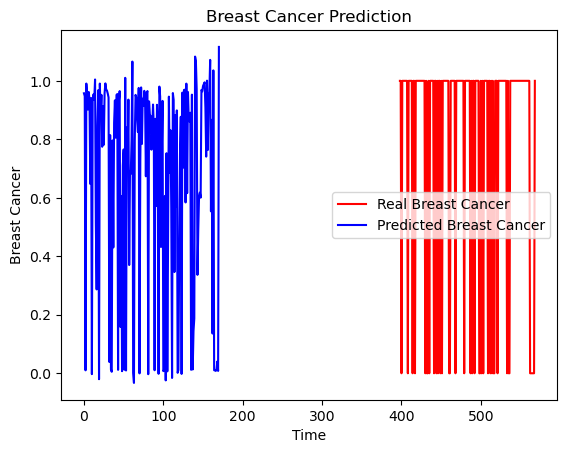

In [5]:
import matplotlib.pyplot as plt

# 결과 시각화
plt.figure()
plt.plot(test_y, color='red', label='Real Breast Cancer')
plt.plot(predicted_y, color='blue', label='Predicted Breast Cancer')
plt.title('Breast Cancer Prediction')
plt.xlabel('Time')
plt.ylabel('Breast Cancer')
plt.legend()
plt.show()

In [6]:
#----------------------------------------------------------------------------------------------------------------------------------

In [7]:
#----------------------------------------------------------------------------------------------------------------------------------

In [8]:
#----------------------------------------------------------------------------------------------------------------------------------

In [9]:
#----------------------------------------------------------------------------------------------------------------------------------

In [10]:
# RNN 사용 예제

In [11]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# 데이터 로드 및 전처리
stock = pd.read_csv("/Users/yeomsangyoon/Visual Studio/0_tensor/source/stock.csv")
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low', 'Close']
stock_AJ = stock[stock['Code'] == 'A060310']
stock_AJ = stock_AJ[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# MinMaxScaler 함수 정의
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

# 데이터 정규화
dfx = stock_AJ[['Open', 'High', 'Low', 'Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open', 'High', 'Low', 'Volume']]

X = dfx.values.tolist()
y = dfy.values.tolist()

# 슬라이딩 윈도우 데이터 분할
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i: i + window_size]
    _y = y[i + window_size]
    data_X.append(_X)
    data_y.append(_y)

train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[:train_size], dtype=np.float32)
train_y = np.array(data_y[:train_size], dtype=np.float32)

test_X = np.array(data_X[train_size:], dtype=np.float32)
test_y = np.array(data_y[train_size:], dtype=np.float32)

# 모델 정의 및 학습
model = Sequential()
model.add(Input(shape=(window_size, 4)))  # Input 레이어 추가
model.add(SimpleRNN(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(SimpleRNN(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

# Early Stopping 콜백 추가
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 예측 및 평가
pred_y = model.predict(test_X)
model.evaluate(test_X, test_y)

# 추가 평가 지표
mae = tf.keras.metrics.mean_absolute_error(test_y, pred_y)
rmse = tf.keras.metrics.RootMeanSquaredError()
rmse.update_state(test_y, pred_y)
rmse_result = rmse.result().numpy()

print(f"MSE: {tf.reduce_mean(tf.square(test_y - pred_y)).numpy()}")
print(f"MAE: {mae.numpy()}")
print(f"RMSE: {rmse_result}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 10, 50)         │         2,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 50)         │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,051 (31.45 KB)

 Trainable params: 7,951 (31.06 KB)

 Non-trainable params: 100 (400.00 B)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.6669 - val_loss: 0.0213
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2567 - val_loss: 0.0140
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2119 - val_loss: 0.0119
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1471 - val_loss: 0.0169
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1720 - val_loss: 0.0179
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1210 - val_loss: 0.0203
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0926 - val_loss: 0.0263
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1010 - val_loss: 0.0279
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0714 - val_loss: 0.0269
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0702 - val_loss: 0.0274
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0758 - val_loss: 0.0269
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0545 - val_loss: 0.0279


In [12]:
from sklearn.metrics import mean_squared_error

ry_preds = model.predict(test_X)
print('평균제곱근오차', mean_squared_error(ry_preds, test_y))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
평균제곱근오차 0.004295392


In [15]:
# 정확도가 0.004295으로 굉장히 좋게 나오는 것을 볼 수 있다.

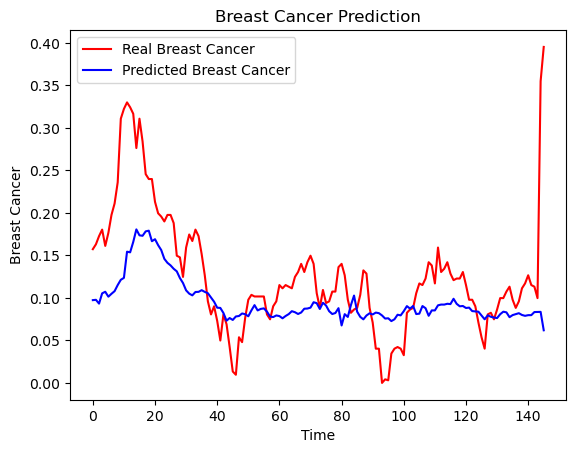

In [14]:
# 결과 시각화
plt.figure()
plt.plot(test_y, color='red', label='Real Breast Cancer')
plt.plot(pred_y, color='blue', label='Predicted Breast Cancer')
plt.title('Breast Cancer Prediction')
plt.xlabel('Time')
plt.ylabel('Breast Cancer')
plt.legend()
plt.show()